In [11]:
import pandas as pd

In [14]:

df=pd.read_csv("C:\\Users\\LENOVO\\python datascience basics (hydrabad ds)\\ASSIGNMENT DATA SCIENCE\\Basic stats - 1\\Basic stats - 1\\sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

In [ ]:
print(" Descriptive Statistics for Numerical Columns\n")

In [ ]:
for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    std_val = df[col].std()

    print("Column:",col)
    print("  Mean   : ",mean_val)
    print("  Median :",median_val)
    print("  Mode   : ",mode_val)
    print("  Std Dev: ",std_val)
    print("-" * 40)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

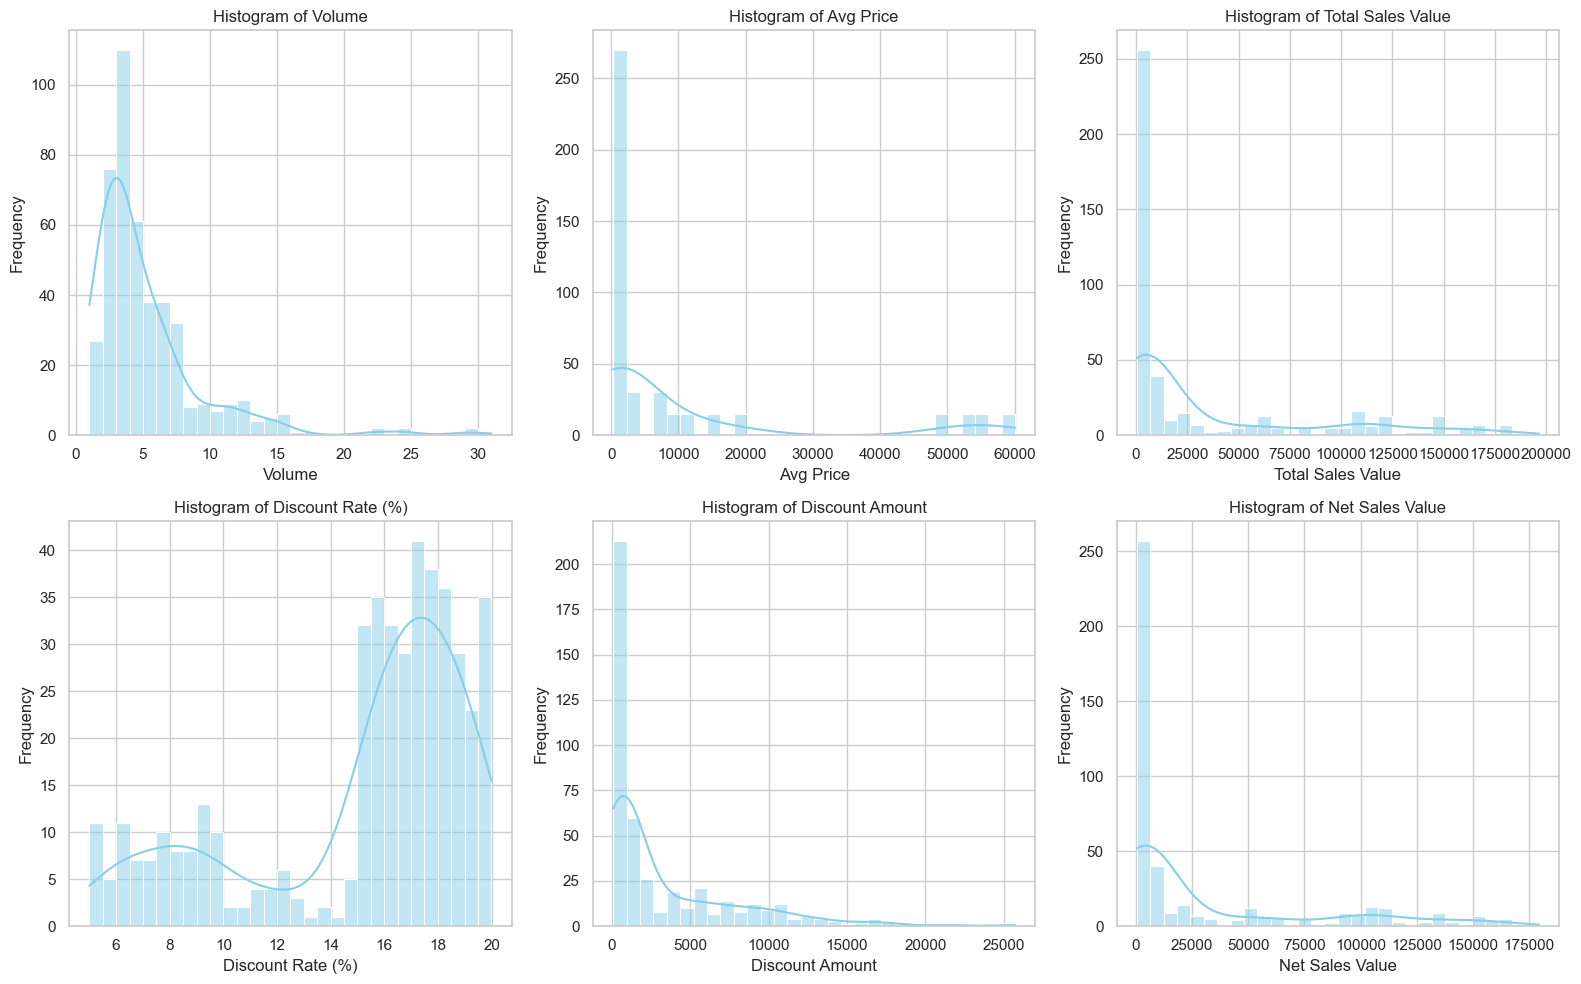

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Plot histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt

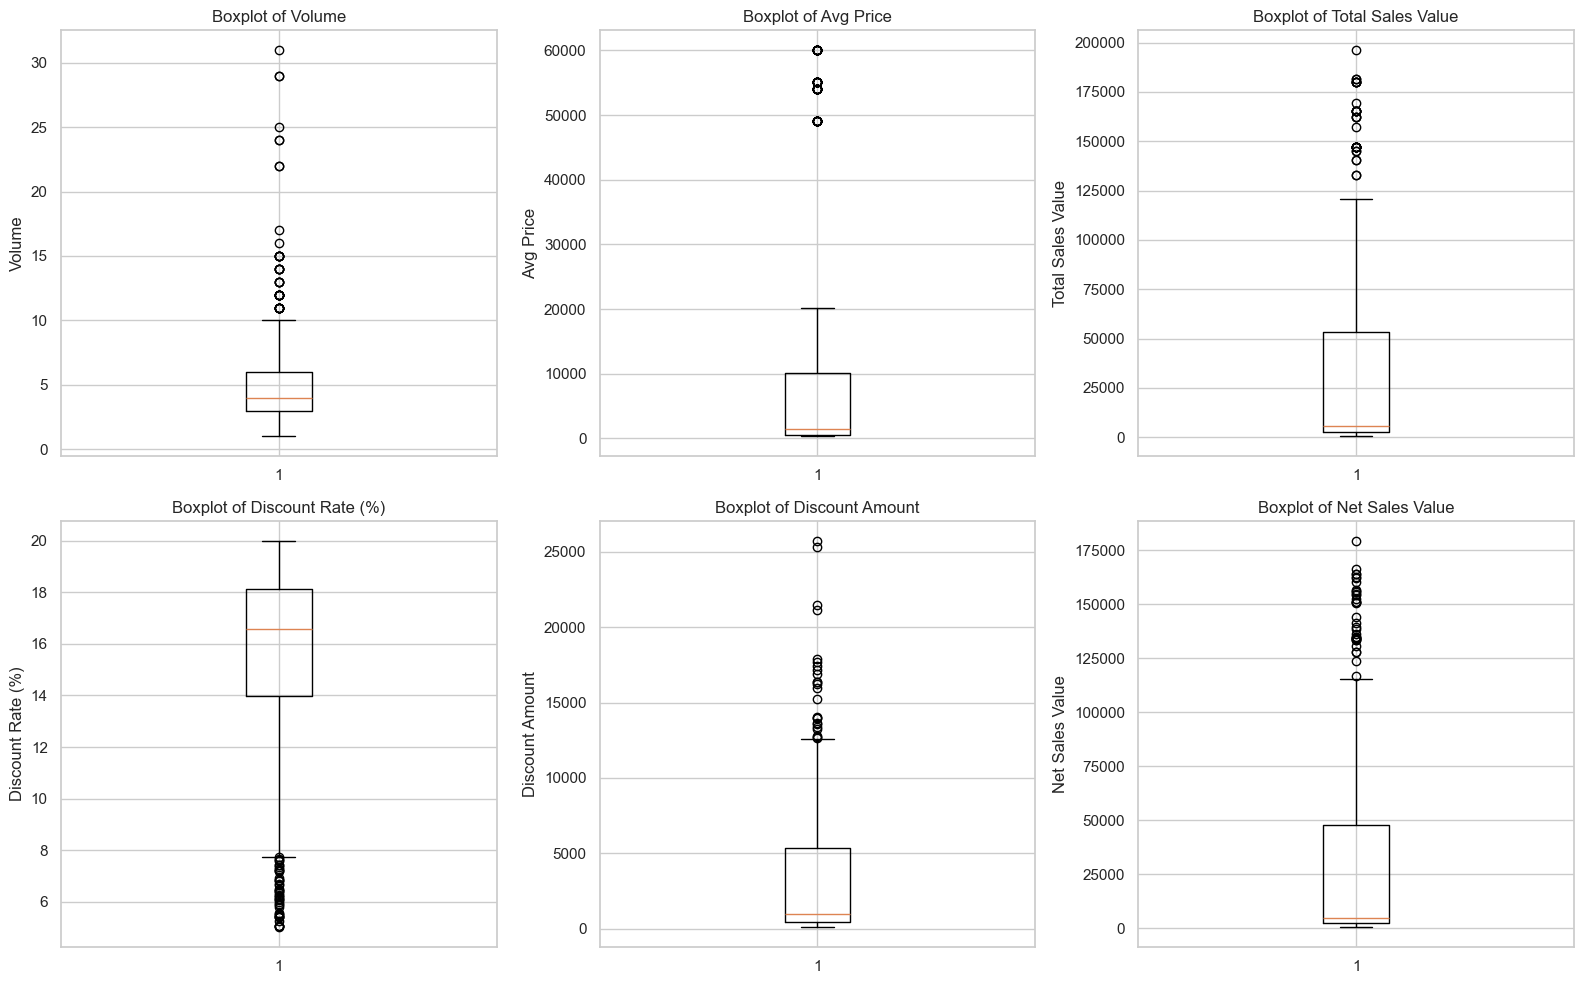

In [28]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col].dropna())  # Drop missing values if any
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

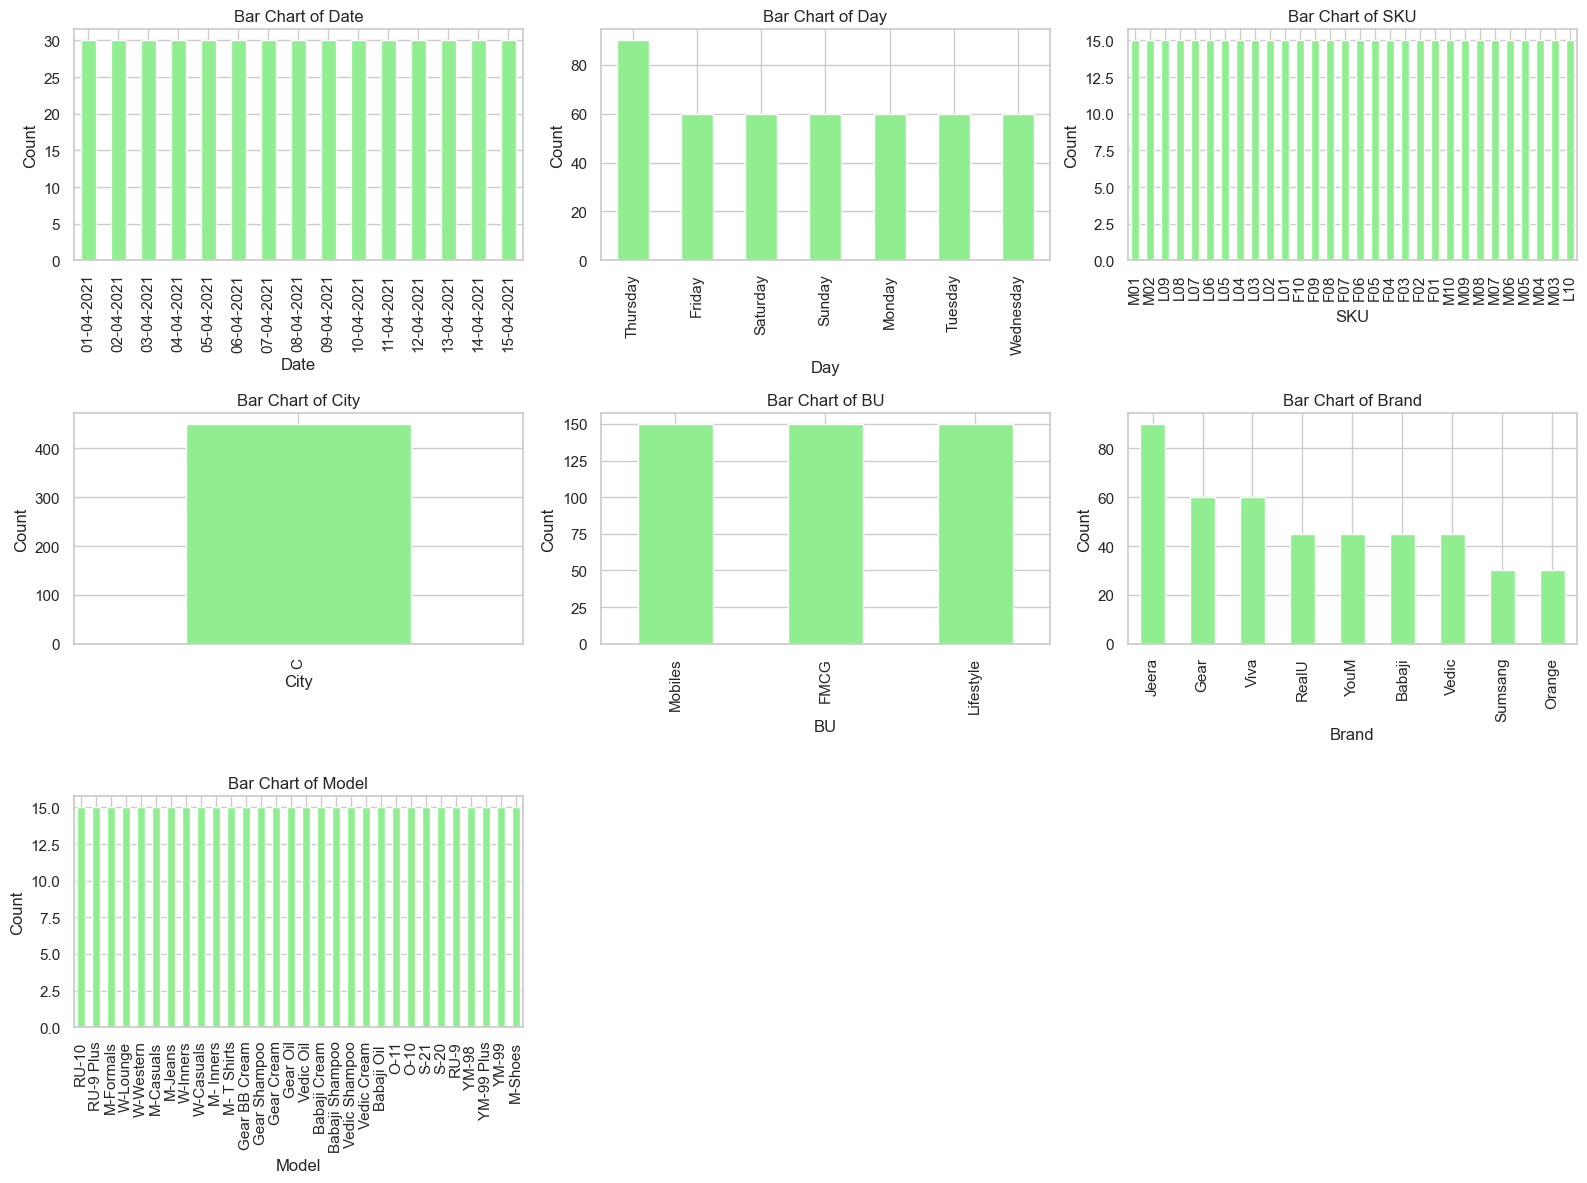

In [29]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Plot bar charts for each categorical column
plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust rows and cols as needed
    df[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [30]:
standardized_df = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    standardized_df[col] = (df[col] - mean) / std

# Display before and after for comparison (first 5 rows)
print("Before Standardization (first 5 rows):")
print(df[numerical_cols].head())

print("\nAfter Standardization (first 5 rows):")
print(standardized_df[numerical_cols].head())


Before Standardization (first 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190 

In [31]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Show part of the transformed dataset
print("One-hot encoded dataset (first 5 rows):")
print(df_encoded.head())

One-hot encoded dataset (first 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Mo